In [275]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [276]:
# load the data
logs = pd.read_csv("C:/Users/rswil/Downloads/DF2022/Data For Students-Updated2022-03-28/data files/logs.csv")

C:\Users\rswil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [277]:
# create player_id list
df_players = []
for i in logs['player_id'].unique():
    df_players.append(logs[logs['player_id'] == i])

In [278]:
# select labels
wordchoice = []
for i in df_players:
    wordchoice.append(i['old_label'])

In [279]:
w = []
for i in wordchoice:
    w.append([x for x in i if pd.isna(x) == False ])

In [280]:
mask = []
for i in w:
    if len(i) == 0:
        mask.append(False)
    else:
        mask.append(True)
trueIndices = []
for i in range(len(mask)):
    if mask[i]:
        trueIndices.append(i)

trueIndicesNonValid = [16, 29, 33, 42, 98, 100]
nonValid = []
for i in trueIndicesNonValid:
    nonValid.append(trueIndices[i])

# nonValid
for i in nonValid:
    mask[i] = not mask[i]

In [281]:
caregroup = []
notcaregroup = []
for i in range(len(mask)):
    if mask[i]:
        caregroup.append(df_players[i])
    else:
        notcaregroup.append(df_players[i])

In [282]:
caregroup_u16 = []
for i in range(len(caregroup)):
    if caregroup[i]['event_time_dbl'].max() <= 57600:
        caregroup_u16.append(caregroup[i])

notcaregroup_u16 = []
for i in range(len(notcaregroup)):
    if notcaregroup[i]['event_time_dbl'].max() <= 57600:
        notcaregroup_u16.append(notcaregroup[i])

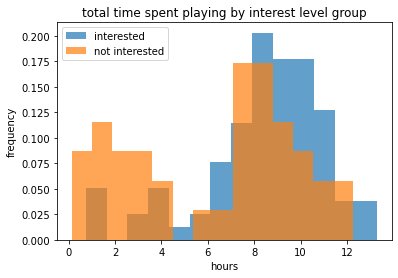

In [283]:
def hours(care_group): 
    total_hours = []
    for i in care_group:
        total_hours.append(i['event_time_dbl'].max()/3600)
    return total_hours
caregroup_hours_spent = hours(caregroup_u16)
notcaregroup_hours_spent = hours(notcaregroup_u16)

plt.hist(caregroup_hours_spent, density = True, bins = 14, alpha = 0.7)
plt.hist(notcaregroup_hours_spent, density = True, bins = 14, alpha = 0.7)
plt.legend(['interested', 'not interested'])
plt.xlabel('hours')
plt.ylabel('frequency')
plt.title('total time spent playing by interest level group')
plt.show()

In [284]:
def prop(care_group): 
    prop = []
    for i in care_group:
        prop.append(i['proportion_complete'].max())
    return prop
caregroup_prop = prop(caregroup_u16)
notcaregroup_prop = prop(notcaregroup_u16)

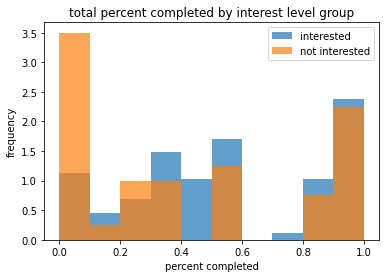

In [285]:
plt.hist(caregroup_prop, density = True, bins = 10, alpha = 0.7)
plt.hist(notcaregroup_prop, density = True, bins = 10, alpha = 0.7)
plt.legend(['interested', 'not interested'])
plt.xlabel('percent completed')
plt.ylabel('frequency')
plt.title('total percent completed by interest level group')
plt.show()

In [286]:
stats.ttest_ind(caregroup_hours_spent, notcaregroup_hours_spent, equal_var = False)

Ttest_indResult(statistic=3.2800487410039767, pvalue=0.0017180054292720468)

In [287]:
stats.ttest_ind(caregroup_prop, notcaregroup_prop, equal_var = False)

Ttest_indResult(statistic=1.6095084730337983, pvalue=0.11227723530853016)

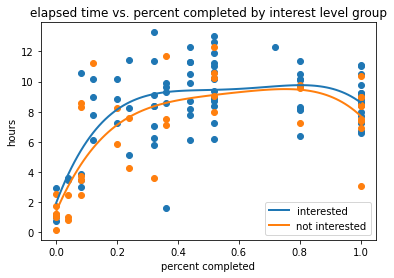

In [288]:
z_care = np.polyfit(caregroup_prop, caregroup_hours_spent, 4)
f_care = np.poly1d(z_care)
x_care = np.linspace(0, 1, 100)
y_care = f_care(x)

z_notcare = np.polyfit(notcaregroup_prop, notcaregroup_hours_spent, 4)
f_notcare = np.poly1d(z_notcare)
x_notcare = np.linspace(0, 1, 100)
y_notcare = f_notcare(x)

plt.scatter(caregroup_prop, caregroup_hours_spent)
plt.plot(x_care, y_care, linewidth = 2)
plt.scatter(notcaregroup_prop, notcaregroup_hours_spent)
plt.plot(x_notcare, y_notcare, linewidth = 2)
plt.legend(['interested', 'not interested'], loc = "lower right")
plt.xlabel('percent completed')
plt.ylabel('hours')
plt.title('elapsed time vs. percent completed by interest level group')
plt.show()

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

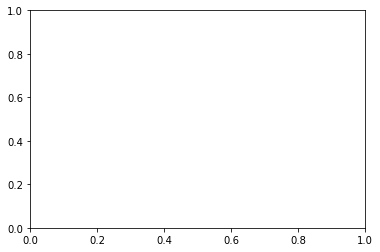

In [289]:
still_care = {0:0, 0.05:0, 0.1:0, 0.15:0, 0.2:0, 0.25:0, 0.3:0, 0.35:0, 0.4:0, 0.45:0, 0.5:0,
              0.55:0, 0.6:0, 0.65:0, 0.70:0, 0.75:0, 0.80:0, 0.85:0, 0.90:0, 0.95:0, 1:0}
for status in caregroup_prop:
    for value in still_care:
        if status >= value: 
            still_care[value] += 1

still_notcare = {0:0, 0.05:0, 0.1:0, 0.15:0, 0.2:0, 0.25:0, 0.3:0, 0.35:0, 0.4:0, 0.45:0, 0.5:0,
              0.55:0, 0.6:0, 0.65:0, 0.70:0, 0.75:0, 0.80:0, 0.85:0, 0.90:0, 0.95:0, 1:0}
for status in notcaregroup_prop:
    for value in still_notcare:
        if status >= value: 
            still_notcare[value] += 1
            
plt.bar([still_care.keys(), still_care.keys()], [still_notcare.values(), still_notcare.values()])
plt.legend(['interested', 'not interested'], loc = "upper right")
plt.xlabel('percent completed')
plt.ylabel('count')
plt.xlim(0, 1)
plt.title('remaining players by interest level group')
plt.show()

print(still_care)
print(still_notcare)

In [ ]:
plt.scatterhist(notcaregroup_event_time, density = True,bins = 10, alpha = 0.7)
plt.legend(['interested', 'not interested'])
plt.xlabel('percent completed')
plt.ylabel('frequency')
plt.title('total percent completed by interest level group')
plt.show()

In [ ]:
df = pd.DataFrame('proportion complete' = )